In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_100 = pd.read_csv('schelling_values_100_model_2.csv',delimiter=";")
df_1000 = pd.read_csv('schelling_values_1000_model_2.csv',delimiter=";")
df_100= df_100[df_100['number of iterations'] !=30000]
df_100 = df_100.groupby('vacant').mean()
df_1000 = df_1000.groupby('vacant').mean()

In [ ]:
df_1000['interratial pears dif'] = df_1000['mean interratial pears final'] - df_1000['mean interratial pears inicial']

In [ ]:
plt.plot(df_1000.index,df_1000['interratial pears dif'],'bo')

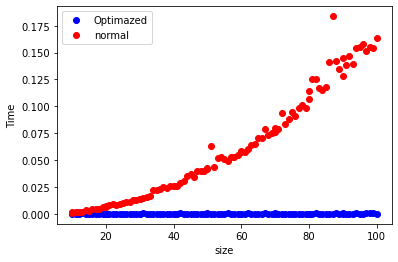

In [3]:
df = pd.read_csv('schelling_optimization_size_0-01.csv',delimiter=";")
plt.plot(df['size'],df['optimized time(s)'],'bo',label="Optimazed")
plt.plot(df['size'],df['normal time(s)'],'ro',label="normal")
plt.xlabel("size")
plt.ylabel("Time")
plt.legend()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xscale'

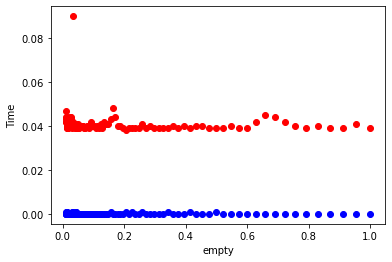

In [5]:
df = pd.read_csv('schelling_optimization_empty_50.csv',delimiter=";")
plt.plot(df['empty'],df['optimized time(s)'],'bo',label="Optimazed")
plt.plot(df['empty'],df['normal time(s)'],'ro',label="normal")
plt.xlabel("empty")
plt.ylabel("Time")
plt.set_xscale('log')
plt.legend()